In [21]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

In [22]:
import pandas as pd
import tqdm as tqdm
label_text = pd.read_csv('labels.csv')
label_text.info()
label_text['breed'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


120

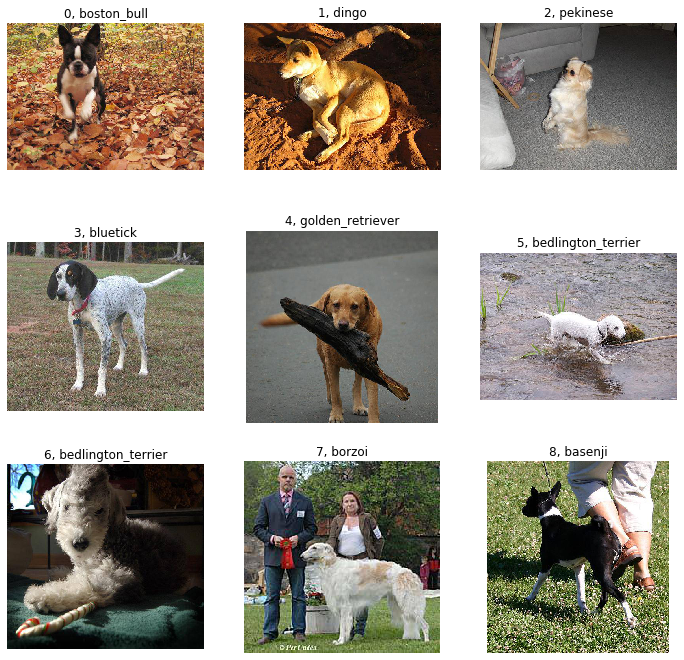

In [14]:
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for c in range(9):
    image_id = label_text.loc[c, 'id']
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread('./train/' + image_id + '.jpg'))
    plt.title(str(c) + ', ' + label_text.loc[c, 'breed'])
    plt.axis('off')
plt.show()

In [15]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

In [16]:
for layer in mobilev2.layers[:-1]:
    layer.trainable = True
    
for layer in mobilev2.layers[:-1]: 
    if 'kernel' in layer.__dict__:
        kernel_shape = np.array(layer.get_weights()).shape
        # weight를 평균이 0, 표준편차가 1인 random 변수로 초기화
        layer.set_weights(tf.random.normal(kernel_shape, 0, 1)) 

In [24]:
import cv2
from tqdm import tqdm

train_X = []
Range = [i for i in range(len(label_text))]
for i in tqdm(Range):
    img = cv2.imread('./train/' + label_text['id'][i] + '.jpg')
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    train_X.append(img)
train_X = np.array(train_X)
print(train_X.shape)
print(train_X.size * train_X.itemsize, 'bytes')

100%|██████████| 10222/10222 [01:01<00:00, 165.89it/s]
(10222, 224, 224, 3)
12309577728 bytes


In [25]:
unique_Y = label_text['breed'].unique().tolist()
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]

In [26]:
train_Y = np.array(train_Y)
print(train_Y[:10])
print(train_Y[-10:])

[0 1 2 3 4 5 5 6 7 8]
[34 87 91 63 48  6 93 63 77 92]


In [27]:
x= mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120,activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input,outputs=predictions)
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

ise[0][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 14, 14, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 14, 14, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 14, 14, 64)   256         block_6_project[0][0]            
__________________________________________________________________________________________________
block_7_expand (Conv2D)         (None, 14, 14, 384)  24576       block_6_project_BN[0][0]         
__________________________________________________________________________________________________
block_7_expand_BN (BatchNormali (None, 14, 14, 384)  1536        block_7_expand[0][0]    

In [28]:
history = model.fit(train_X,train_Y,epochs=10,validation_split=0.25,batch_size=32)

Train on 7666 samples, validate on 2556 samples
Epoch 1/10
7666/7666 [==============================] - 93s 12ms/sample - loss: 4.9022 - accuracy: 0.0076 - val_loss: 9.2144 - val_accuracy: 0.0102
Epoch 2/10
7666/7666 [==============================] - 84s 11ms/sample - loss: 4.8433 - accuracy: 0.0113 - val_loss: 8.9625 - val_accuracy: 0.0098
Epoch 3/10
7666/7666 [==============================] - 83s 11ms/sample - loss: 4.8240 - accuracy: 0.0132 - val_loss: 9.2710 - val_accuracy: 0.0117
Epoch 4/10
7666/7666 [==============================] - 80s 10ms/sample - loss: 4.8024 - accuracy: 0.0138 - val_loss: 8.7525 - val_accuracy: 0.0110
Epoch 5/10
7666/7666 [==============================] - 80s 10ms/sample - loss: 4.7835 - accuracy: 0.0170 - val_loss: 7.7384 - val_accuracy: 0.0106
Epoch 6/10
7666/7666 [==============================] - 79s 10ms/sample - loss: 4.7566 - accuracy: 0.0163 - val_loss: 7.9782 - val_accuracy: 0.0153
Epoch 7/10
7666/7666 [==============================] - 80s 10ms

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>